#House price prediction (Delhi)

In [1]:
import numpy as np
import pandas as pd 


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [143]:
House_data = pd.read_csv("MagicBricks.csv")

In [144]:
House_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [145]:
House_data.shape

(1259, 11)

In [146]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
Area           1259 non-null float64
BHK            1259 non-null int64
Bathroom       1257 non-null float64
Furnishing     1254 non-null object
Locality       1259 non-null object
Parking        1226 non-null float64
Price          1259 non-null int64
Status         1259 non-null object
Transaction    1259 non-null object
Type           1254 non-null object
Per_Sqft       1018 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [152]:
House_data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [170]:
House_data.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

#Univariate Analysis

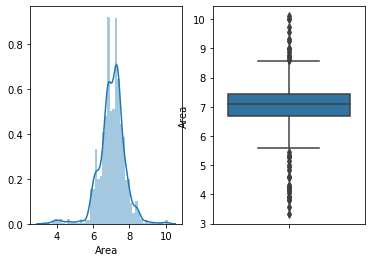

In [199]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(House_data['Area'])
plt.subplot(1,2,2)
sns.boxplot(House_data['Area'], orient="v")

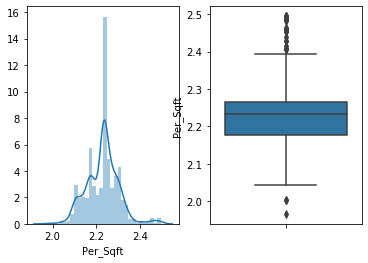

In [206]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(House_data['Per_Sqft'])
plt.subplot(1,2,2)
sns.boxplot(House_data['Per_Sqft'], orient="v")

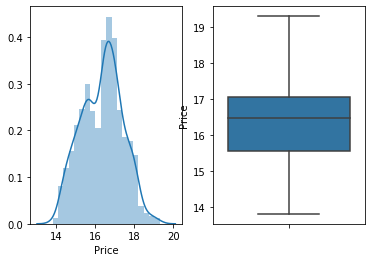

In [203]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(House_data['Price'])
plt.subplot(1,2,2)
sns.boxplot(House_data['Price'], orient="v")

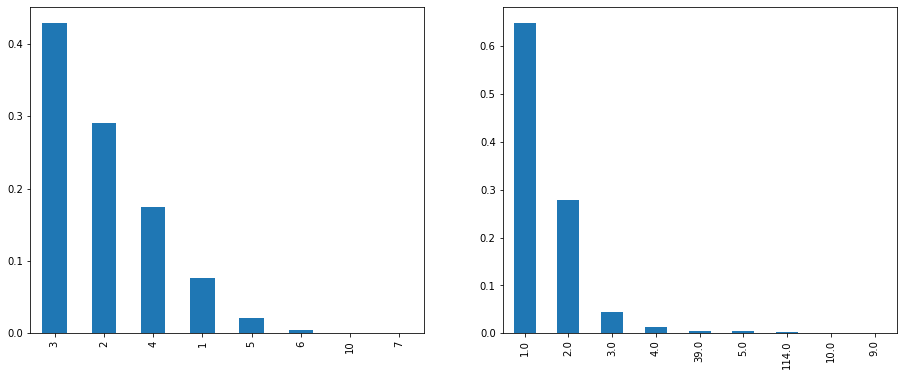

In [99]:
#House_data['BHK']=House_data['BHK'].value_counts()
#sns.barplot(House_data['BHK'].value_counts(normalize=True), orient="v")
plt.figure(1)
plt.subplot(1,3,1)
House_data['BHK'].value_counts(normalize=True).plot.bar(figsize=(24,6))
plt.subplot(1, 3, 2)
House_data['Parking'].value_counts(normalize=True).plot.bar()

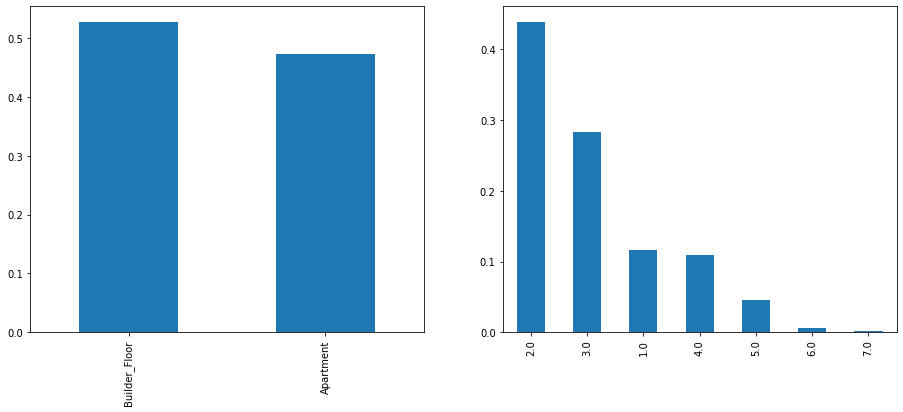

In [100]:
plt.figure(1)
plt.subplot(1,3,1)
House_data['Type'].value_counts(normalize=True).plot.bar(figsize=(24,6))
plt.subplot(1, 3, 2)
House_data['Bathroom'].value_counts(normalize=True).plot.bar()

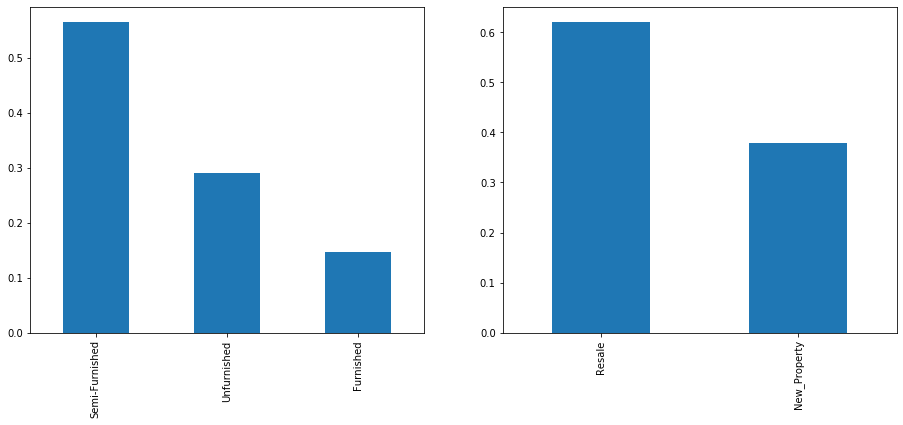

In [102]:
plt.figure(1)
plt.subplot(1,3,1)
House_data['Furnishing'].value_counts(normalize=True).plot.bar(figsize=(24,6))
plt.subplot(1, 3, 2)
House_data['Transaction'].value_counts(normalize=True).plot.bar()

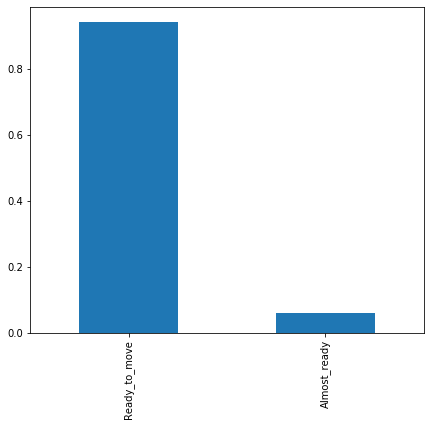

In [103]:
plt.figure(1)
plt.subplot(1,3,1)
House_data['Status'].value_counts(normalize=True).plot.bar(figsize=(24,6))
#plt.subplot(1, 3, 2)
#House_data['Parking'].value_counts(normalize=True).plot.bar()

In [168]:
House_data[House_data['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",1.0,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",1.0,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",1.0,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",1.0,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,NaN


In [169]:
House_data[House_data['Type'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",1.0,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",1.0,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",1.0,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",1.0,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,NaN


#Missing Value treatment

In [204]:
House_data['Per_Sqft'] = House_data['Per_Sqft'].fillna(value=House_data['Per_Sqft'].median())

In [167]:
House_data['Parking'] = House_data['Parking'].fillna(1)

In [158]:
House_data['Bathroom'] = House_data['Bathroom'].fillna(value=1)

In [121]:
House_data['Furnishing'] = House_data['Furnishing'].fillna(value=House_data['Furnishing'].mode()[0])

In [122]:
House_data['Type'] = House_data['Type'].fillna(value=House_data['Type'].mode()[0])

#Bivariate Analysis

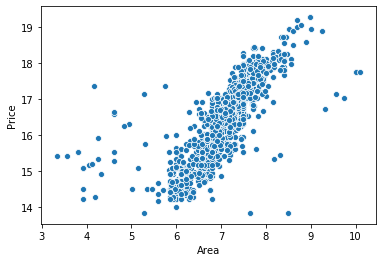

In [209]:
sns.scatterplot(x='Area', y='Price', data=House_data)

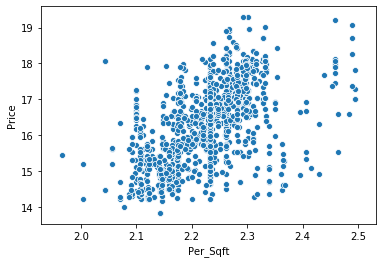

In [208]:
sns.scatterplot(x='Per_Sqft', y='Price', data=House_data)

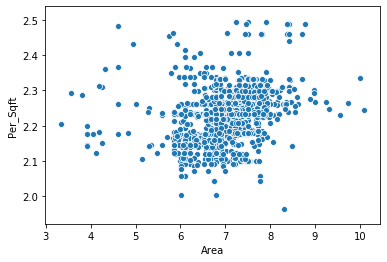

In [207]:
sns.scatterplot(x='Area', y='Per_Sqft', data=House_data)

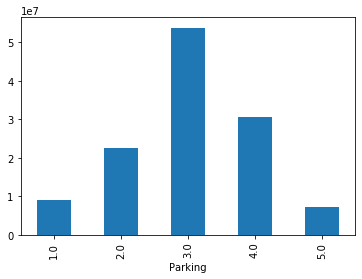

In [196]:
House_data.groupby('Parking')['Price'].median().plot.bar()

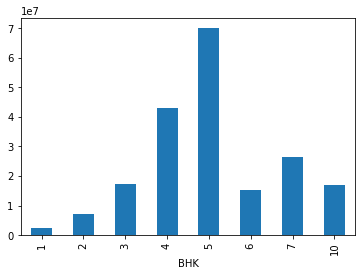

In [195]:
House_data.groupby('BHK')['Price'].median().plot.bar()

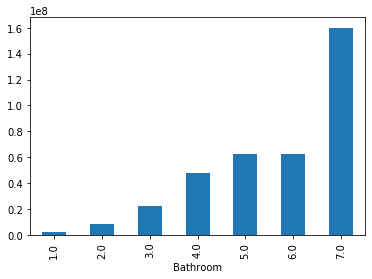

In [194]:
House_data.groupby('Bathroom')['Price'].median().plot.bar()

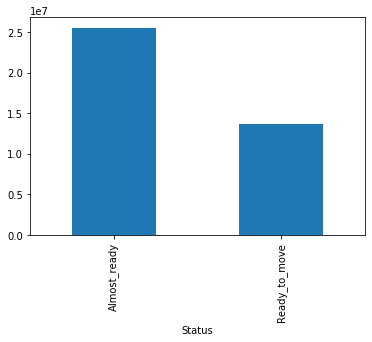

In [131]:
House_data.groupby('Status')['Price'].median().plot.bar()

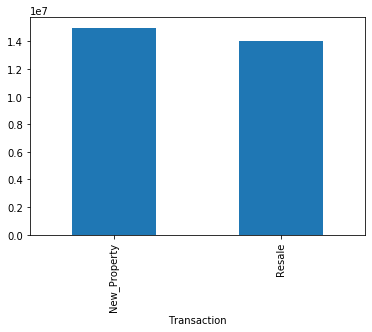

In [132]:
House_data.groupby('Transaction')['Price'].median().plot.bar()

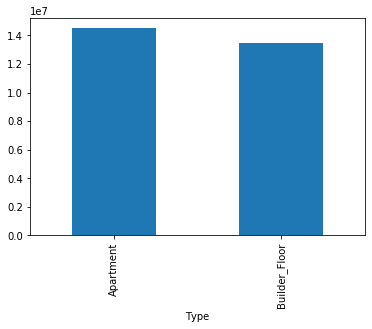

In [133]:
House_data.groupby('Type')['Price'].median().plot.bar()

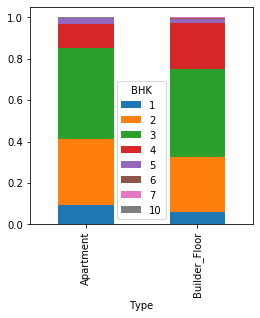

In [135]:
Type=pd.crosstab(House_data['Type'],House_data['BHK']) 
Type.div(Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

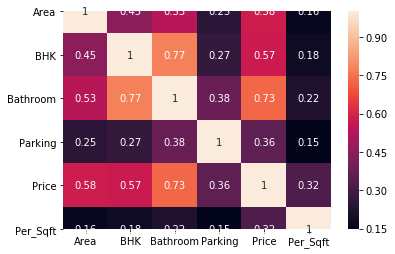

In [193]:
plt.subplot(1,1,1)
sns.heatmap(House_data.corr(), annot=True)

In [210]:
House_data.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.642625,0.699758,0.321350,0.760950,0.273103
BHK,0.642625,1.000000,0.774184,0.266754,0.685286,0.256667
Bathroom,0.699758,0.774184,1.000000,0.379380,0.783055,0.323248
Parking,0.321350,0.266754,0.379380,1.000000,0.375064,0.251432
Price,0.760950,0.685286,0.783055,0.375064,1.000000,0.516588
Per_Sqft,0.273103,0.256667,0.323248,0.251432,0.516588,1.000000


In [198]:
House_data['Area']=np.log(House_data['Area'])

In [185]:
House_data['Parking'] = House_data['Parking'].replace(9, 2)

In [205]:
House_data['Per_Sqft']=np.log(House_data['Per_Sqft'])

In [201]:
House_data['Price']=np.log(House_data['Price'])

In [274]:
X=House_data.drop("Locality", axis=1)

In [ ]:
X=House_data.drop("Price",axis=1)

In [272]:
X=House_data.drop("Per_Sqft", axis=1)

In [280]:
X=House_data.drop(["Locality","Price", "Per_Sqft"], axis=1)

In [268]:
y=House_data.Price

In [284]:
y

0       15.687313
1       15.424948
2       16.556351
3       15.250595
4       15.640060
          ...    
1254    17.822844
1255    16.341239
1256    16.677711
1257    16.257858
1258    16.733281
Name: Price, Length: 1259, dtype: float64

In [282]:
X=pd.get_dummies(X)

In [283]:
X.head()

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,6.684612,3,2.0,1.0,0,1,0,0,1,1,0,0,1
1,6.620073,2,2.0,1.0,0,1,0,0,1,1,0,1,0
2,6.856462,2,2.0,1.0,1,0,0,0,1,0,1,1,0
3,6.396930,2,2.0,1.0,0,1,0,0,1,0,1,0,1
4,6.476972,2,2.0,1.0,0,1,0,0,1,1,0,0,1


In [285]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [286]:
from sklearn.linear_model import LinearRegression 

In [287]:
model=LinearRegression()

In [288]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
prediction=model.predict(x_cv)

In [290]:
prediction

array([15.90970711, 15.63065092, 16.79001648, 15.93358691, 15.87407406,
       16.33668695, 16.60686125, 17.84187088, 16.68827969, 16.78632092,
       16.42219091, 19.61215422, 15.70418271, 16.96859009, 17.50563923,
       16.05671388, 14.76995645, 16.87988259, 17.84862472, 16.07468445,
       16.0677312 , 16.0689623 , 16.17033439, 15.30335261, 18.01186884,
       16.94635857, 17.44414218, 15.96592099, 16.70955753, 15.83224688,
       15.62468682, 15.75568878, 17.43710678, 16.12360642, 17.31786978,
       16.32489765, 15.89265083, 15.06352862, 15.95680305, 18.47994284,
       16.40067398, 17.44459904, 15.98617445, 16.57512867, 16.62388837,
       16.65901451, 16.2299071 , 14.66731969, 15.10474452, 16.70923753,
       16.56582938, 16.03059855, 16.38256361, 15.822162  , 16.51571712,
       16.71984771, 16.76476437, 16.11637643, 15.79084061, 14.81005074,
       17.5682646 , 16.42699038, 16.94403481, 16.61362735, 14.73712562,
       15.88793432, 16.84279213, 16.1110575 , 16.73561789, 15.89

In [242]:
print(model.intercept_)
print(model.coef_)

0.051940930851881006
[-1.80201955e-16  1.11022302e-15 -1.88737914e-15  9.15933995e-16
  1.00000000e+00 -3.75619630e-02 -3.75619630e-02 -3.75619630e-02
  2.10575514e-04  2.10575514e-04  2.10575514e-04  2.10575514e-04
  2.10575514e-04  2.10575514e-04  2.10575514e-04  2.10575514e-04
  2.10575514e-04  2.10575514e-04  2.10575514e-04  1.14080594e-03
  2.10575514e-04  2.10575514e-04  2.10575514e-04 -2.83085118e-03
  2.10575514e-04  7.92089834e-03  2.10575514e-04  2.10575514e-04
  2.10575514e-04  5.95915038e-03  2.10575514e-04 -1.09621176e-02
  2.10575514e-04  2.10575514e-04  4.77767691e-03  2.10575514e-04
  2.10575514e-04  2.10575514e-04  2.10575514e-04  2.10575514e-04
  2.10575514e-04  2.10575514e-04  2.10575514e-04  2.10575514e-04
  2.10575514e-04  2.10575514e-04  2.10575514e-04  5.28352817e-04
  2.10575514e-04  2.10575514e-04  2.10575514e-04  2.10575514e-04
  2.10575514e-04  2.10575514e-04 -4.83973465e-03  2.90538223e-03
  2.10575514e-04  2.10575514e-04  2.10575514e-04  2.10575514e-04
  2.

In [291]:
from sklearn import metrics

In [292]:
metrics.mean_absolute_error(y_cv, prediction)

0.454382776799883

In [293]:
np.sqrt(metrics.mean_squared_error(y_cv, prediction))

0.5582606693625993

In [294]:
metrics.r2_score(y_cv, prediction)

0.7259127664551887

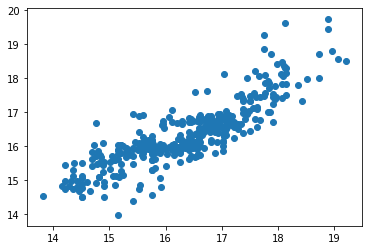

In [295]:
plt.scatter(y_cv, prediction)

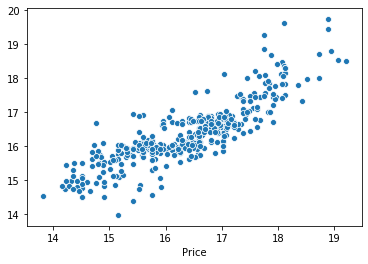

In [296]:
sns.scatterplot(y_cv, prediction)

In [297]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     309.9
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        15:42:08   Log-Likelihood:                -1064.0
No. Observations:                1259   AIC:                             2150.
Df Residuals:                    1248   BIC:                             2207.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/Users/divakarsharma/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
